In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot as plt
from sklearn.svm import SVR
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [ ]:
df= pd.read_csv('/content/S_n_I_A_N_P_An_Io_noaa2.txt', sep='\s+', header=None)

In [ ]:
df.columns=['SAM','nino','ISMR','AMO','NAO','PDO','At-nino','IOD']

In [ ]:
df

,SAM,nino,ISMR,AMO,NAO,PDO,At-nino,IOD
0,0.599257,0.167651,10.24380,0.484010,0.000837,1.084100,0.560382,-0.295856
1,0.663879,0.212788,44.16110,0.603261,-0.317969,-1.465790,1.189540,-0.032952
2,-0.428772,0.336627,4.76807,0.609364,0.423296,0.114019,0.783738,-0.644708
3,0.513283,0.575112,-63.58770,0.219494,0.352545,1.807430,0.560395,-0.295477
4,-0.260801,0.647786,12.57720,0.040233,-0.528239,-0.108867,0.727379,0.044719
...,...,...,...,...,...,...,...,...
865,1.147740,1.296340,23.70850,0.161498,-0.385948,0.108982,-0.079691,0.297551
866,1.579510,1.572200,-41.18450,0.174294,-0.945931,2.158290,-0.189664,0.441171
867,0.923487,2.007070,-56.14030,0.277507,0.413170,0.031796,-0.188361,0.534373
868,0.207229,2.259830,-43.77540,0.492069,-0.579453,-1.432400,0.008520,0.771095


In [ ]:
df_new = df.drop('SAM', axis=1)
df_new = df_new.dropna()
df_new

,nino,ISMR,AMO,NAO,PDO,At-nino,IOD
0,0.167651,10.24380,0.484010,0.000837,1.084100,0.560382,-0.295856
1,0.212788,44.16110,0.603261,-0.317969,-1.465790,1.189540,-0.032952
2,0.336627,4.76807,0.609364,0.423296,0.114019,0.783738,-0.644708
3,0.575112,-63.58770,0.219494,0.352545,1.807430,0.560395,-0.295477
4,0.647786,12.57720,0.040233,-0.528239,-0.108867,0.727379,0.044719
...,...,...,...,...,...,...,...
865,1.296340,23.70850,0.161498,-0.385948,0.108982,-0.079691,0.297551
866,1.572200,-41.18450,0.174294,-0.945931,2.158290,-0.189664,0.441171
867,2.007070,-56.14030,0.277507,0.413170,0.031796,-0.188361,0.534373
868,2.259830,-43.77540,0.492069,-0.579453,-1.432400,0.008520,0.771095


# XGboost Regressor 

[07:11:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Lag= 0
      Given Y  Predicted Y
0    10.24380     7.448383
1    44.16110    41.557453
2     4.76807     4.558417
3   -63.58770   -61.385807
4    12.57720    11.142217
..        ...          ...
865  23.70850    18.866394
866 -41.18450   -41.521458
867 -56.14030   -52.910480
868 -43.77540   -43.309002
869 -40.42980   -40.947327

[870 rows x 2 columns]
Error Value:  2.5746706040635248


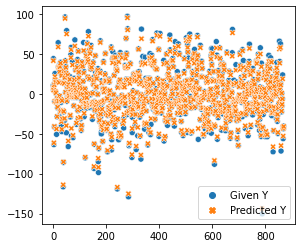

[07:11:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Lag= 1
      Given Y  Predicted Y
1    44.16110    42.668888
2     4.76807     4.577260
3   -63.58770   -63.150272
4    12.57720    12.334751
5   -41.57720   -41.655464
..        ...          ...
865  23.70850    22.919191
866 -41.18450   -38.235149
867 -56.14030   -55.545849
868 -43.77540   -42.249973
869 -40.42980   -39.701359

[869 rows x 2 columns]
Error Value:  1.88771781311285


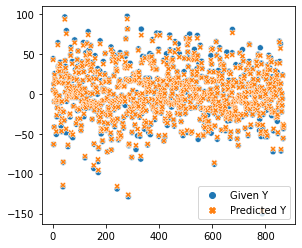

[07:11:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Lag= 2
      Given Y  Predicted Y
2     4.76807     4.518691
3   -63.58770   -61.590740
4    12.57720    12.509246
5   -41.57720   -39.020699
6    -9.54688    -9.571276
..        ...          ...
865  23.70850    21.566679
866 -41.18450   -37.646553
867 -56.14030   -51.508110
868 -43.77540   -41.595612
869 -40.42980   -35.990158

[868 rows x 2 columns]
Error Value:  3.67791219229121


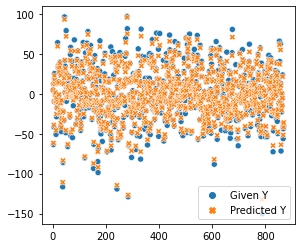

[07:11:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Lag= 3
      Given Y  Predicted Y
3   -63.58770   -57.048172
4    12.57720    11.708404
5   -41.57720   -39.265095
6    -9.54688    -9.002103
7    25.37050    21.409670
..        ...          ...
865  23.70850    21.504412
866 -41.18450   -34.378822
867 -56.14030   -53.973358
868 -43.77540   -35.757107
869 -40.42980   -38.737705

[867 rows x 2 columns]
Error Value:  3.474003959311195


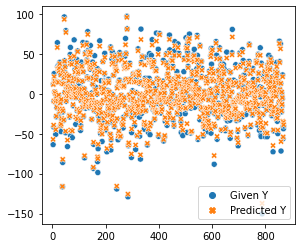

[07:11:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Lag= 4
      Given Y  Predicted Y
4    12.57720    11.033599
5   -41.57720   -38.636688
6    -9.54688    -8.350634
7    25.37050    23.683344
8    18.27740    17.178528
..        ...          ...
865  23.70850    23.354864
866 -41.18450   -37.277576
867 -56.14030   -46.589088
868 -43.77540   -39.795368
869 -40.42980   -27.783297

[866 rows x 2 columns]
Error Value:  4.56548868564346


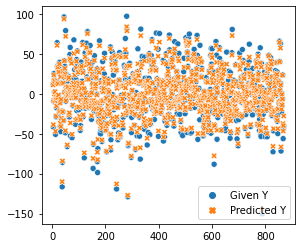

[07:11:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Lag= 5
      Given Y  Predicted Y
5   -41.57720   -39.122776
6    -9.54688    -9.422244
7    25.37050    24.236088
8    18.27740    16.096640
9     2.22167    -0.804631
..        ...          ...
865  23.70850    23.493422
866 -41.18450   -40.104183
867 -56.14030   -54.406719
868 -43.77540   -41.100338
869 -40.42980   -39.449242

[865 rows x 2 columns]
Error Value:  3.199627690413069


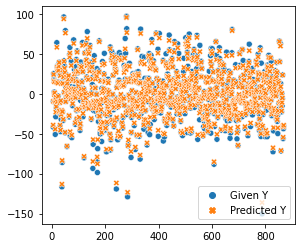

[07:11:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Lag= 6
      Given Y  Predicted Y
6    -9.54688    -7.231282
7    25.37050    23.803669
8    18.27740    15.917688
9     2.22167     1.820650
10   16.88660     9.629879
..        ...          ...
865  23.70850    20.721819
866 -41.18450   -40.226089
867 -56.14030   -55.375576
868 -43.77540   -43.264130
869 -40.42980   -37.881718

[864 rows x 2 columns]
Error Value:  3.664038013739604


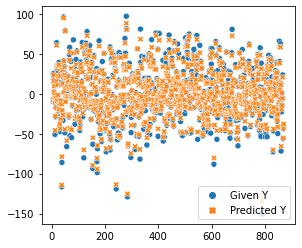

In [ ]:
lag = [0,1,2,3,4,5,6]
l=100000.00
f_lag=-1
for i in lag:
  if i>0:
    X = df_new.iloc[:(-i), :]
    X = X.drop('ISMR', axis=1)
    Y = df_new.iloc[i:, 1]
  else:
    X = df_new.drop('ISMR', axis=1)
    Y = df_new['ISMR']
  xgb = XGBRegressor(random_state=10, max_depth=10)
  xgb.fit(X, Y)
  y_pred = xgb.predict(X)
  ans = pd.DataFrame({'Given Y':Y, 'Predicted Y':y_pred})
  print("Lag=", i)
  print(ans)
  err=  mse(ans['Given Y'], ans['Predicted Y'], squared=False)
  print("Error Value: ",err)
  plt.figure(figsize=(10,4))
  ax1 = plt.subplot(1,2,1)
  sns.scatterplot(data=ans, ax=ax1)
  plt.show()
  
  if(l>err):
    l=err
    f_lag=i


In [ ]:
l, f_lag

(1.88771781311285, 1)

# SVM

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ................................C=1, kernel=sigmoid; total time=   0.1s
[CV] END ................................C=1, ke

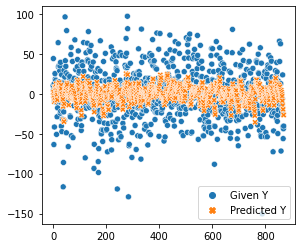

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ................................C=1, kernel=sigmoid; total time=   0.1s
[CV] END ................................C=1, ke

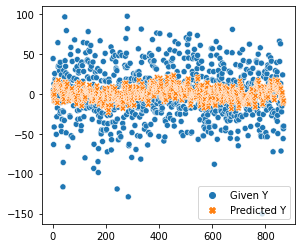

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ................................C=1, kernel=sigmoid; total time=   0.1s
[CV] END ................................C=1, ke

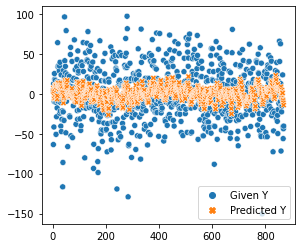

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ................................C=1, kernel=sigmoid; total time=   0.1s
[CV] END ................................C=1, ke

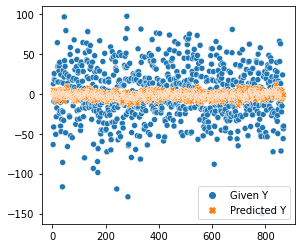

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ................................C=1, kernel=sigmoid; total time=   0.1s
[CV] END ................................C=1, ke

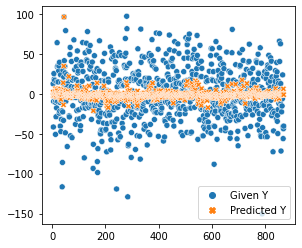

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ................................C=1, kernel=sigmoid; total time=   0.1s
[CV] END ................................C=1, ke

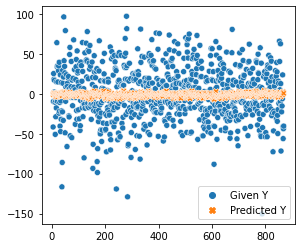

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ................................C=1, kernel=sigmoid; total time=   0.1s
[CV] END ................................C=1, ke

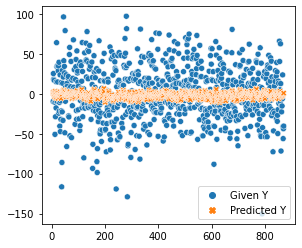

In [ ]:
lag = [0,1,2,3,4,5,6]
l=100000.00
f_lag=-1
for i in lag:
  if i>0:
    X = df_new.iloc[:(-i), :]
    X = X.drop('ISMR', axis=1)
    Y = df_new.iloc[i:, 1]
  else:
    X = df_new.drop('ISMR', axis=1)
    Y = df_new['ISMR']
  param_grid = {'C': [1, 10, 100, 1000], 'kernel': ['rbf', 'poly', 'sigmoid','linear']}
  
  grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
  grid.fit(X,Y)
  
  y_pred = grid.predict(X)
  ans = pd.DataFrame({'Given Y':Y, 'Predicted Y':y_pred})
  print("Lag=", i)
  print(grid.best_estimator_)
  print(ans)
  err=  mse(ans['Given Y'], ans['Predicted Y'], squared=False)
  print("Error Value: ",err)
  plt.figure(figsize=(10,4))
  ax1 = plt.subplot(1,2,1)
  sns.scatterplot(data=ans, ax=ax1)
  plt.show()
  if(l>err):
    l=err
    f_lag=i
  
 

In [ ]:
l, f_lag

(31.25854336603107, 0)